In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("D:/csv files/mpg.csv")

In [3]:
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Wants to predict mpg based on weight

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## EDA

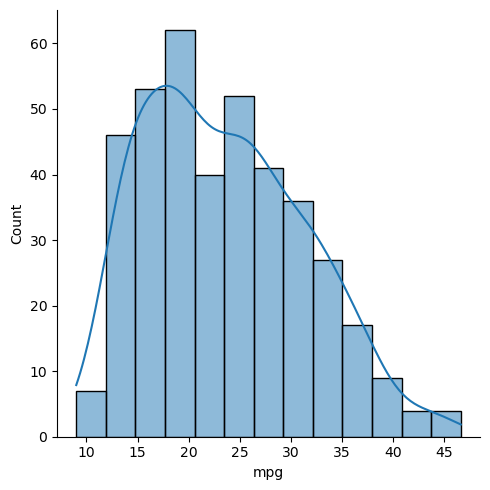

In [29]:
sns.displot(x=data.mpg,data=data,kde=True)

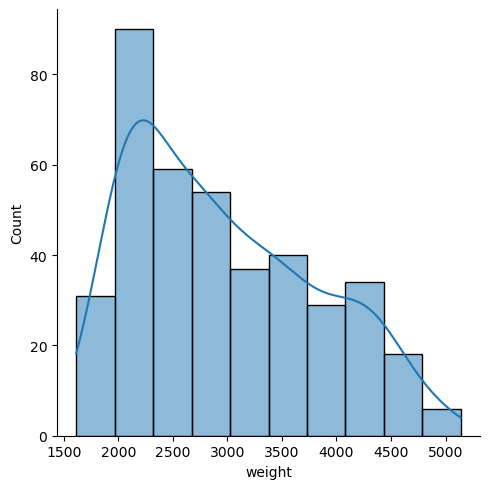

In [30]:
sns.displot(x=data.weight,data=data,kde=True)

<Axes: xlabel='mpg', ylabel='weight'>

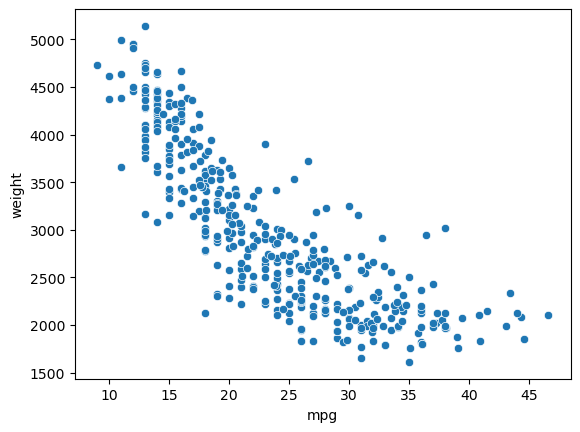

In [8]:
sns.scatterplot(x=data.mpg,y=data.weight,data=data)

## coorelation

C:\Users\parit\AppData\Local\Temp\ipykernel_25800\3284826886.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),vmin=-1,annot=True)


<Axes: >

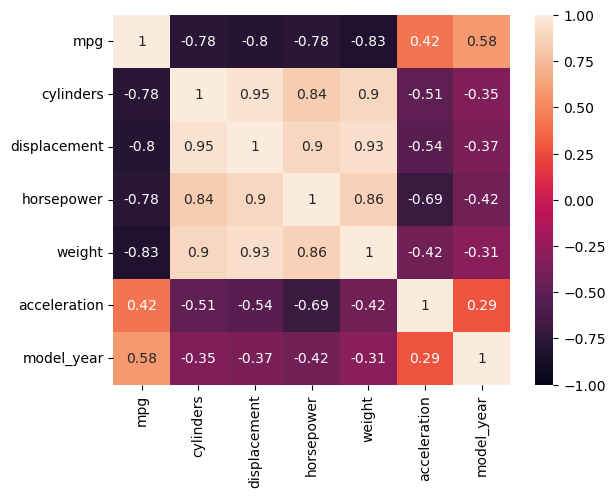

In [9]:
sns.heatmap(data.corr(),vmin=-1,annot=True)

## checking null values

In [10]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [11]:
data.horsepower.fillna(data.horsepower.mean(),inplace=True)

In [12]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

## linear regression model

In [13]:
y=data["mpg"].values.reshape(-1,1)
x=data["weight"].values.reshape(-1,1)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lin=LinearRegression()

In [18]:
model=lin.fit(x_train,y_train)
print("training completed")

training completed


In [19]:
print(model.score(x_train,y_train))
print("training score of a model")

0.6844798112332582
training score of a model


In [20]:
pred=model.predict(x_test)

In [21]:
from sklearn.metrics import r2_score

In [22]:
print("testing score of a model =",r2_score(y_test,pred))

testing score of a model = 0.722971057303075


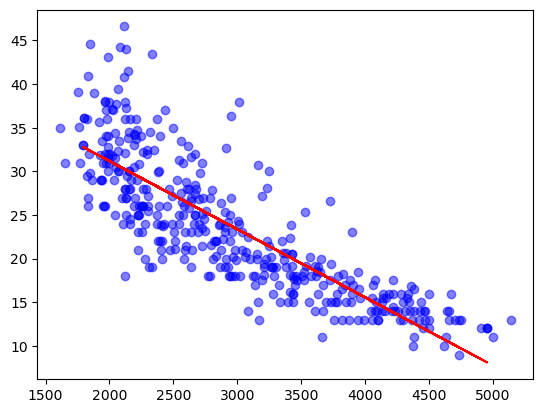

In [23]:
plt.scatter(x,y,color="b",alpha=0.5)
plt.plot(x_test,pred,color="r")

In [25]:
weight=[3520,3500,4000]
raw_data=pd.DataFrame({"weight":weight})

In [26]:
raw_data

,weight
0,3520
1,3500
2,4000


In [28]:
model.predict(raw_data)

C:\Users\parit\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[19.30761029],
       [19.46371514],
       [15.56109396]])